# Dataset of an Electrical Grid Stability 

       # Variable Information

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
   2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
   3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
   4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
   5. stabf: the stability label of the system (categorical: stable/unstable)





1. PREDICTIVE ATTRIBUTES

%%1.1 tau[x] (Reaction Time of Participant)

* Type: Real-valued continuous attribute.
* Description: Represents the reaction time of the participant in seconds.
    For example, tau1 corresponds to the electricity producer, and other tau[x] values are for consumers.
* Range: [0.5, 10] seconds.
    
%%1.2 p[x] (Power Consumed/Produced)

* Type: Real-valued continuous attribute.
* Description: Represents the nominal power consumed or produced. 
    Negative values indicate power consumption, and positive values indicate power production.
* Range: [-0.5, -2] (for consumption), and positive values for production.
Note: p1 is defined as the absolute value of the sum of p2 + p3 + p4, 
    which implies that p1 is dependent on the other p[x] values.
    
%%1.3 g[x] (Gamma Coefficient - Price Elasticity)
* Type: Real-valued continuous attribute.
* Description: This coefficient represents price elasticity in the system, 
    which measures how responsive the power grid is to price changes.
* Range: [0.05, 1] per second.
Note: g1 corresponds to the electricity producer, and other g[x] values are for consumers.

%%1.4 stab (Max Real Part of Characteristic Equation Root)
* Type: Real-valued continuous attribute.
* Description: This is a measure of the stability of the system.
    If the value is positive, the system is linearly unstable.
* Range: Real numbers.
    
2.NON-PREDICTIVE ATTRIBUTES

%%2.1 p1 (Nominal Power Relationship)
* Type: Real-valued continuous attribute.
* Description: p1 is computed as the absolute value of the sum of p2 + p3 + p4.
    This feature is dependent on the other p[x] values.

3.GOAL FIELDS(Target Variables):

These are the outcome variables you're trying to predict:

%% 3.1 stabf (Stability Label)
* Type: Categorical attribute (classification label).
* Description: The stability label of the power grid system, 
    where the system is either "stable" or "unstable".
* Categories: stable, unstable.
    
%% 3.2 tau[x] (Reaction Time)
* Type: Real-valued continuous attribute (regression label).
* Description: The reaction time of the participant (in seconds),
    with tau1 corresponding to the electricity producer.


In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
 

In [3]:
# loading the dataset

df = pd.read_csv('electrical_grid_data.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.tail()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable
9999,6.530527,6.781790,4.349695,8.673138,3.492807,-1.390285,-1.532193,-0.570329,0.073056,0.505441,0.378761,0.942631,0.045263,unstable


In [3]:
df.shape          # identifying the no: of columns and rows

(10000, 14)

In [5]:
df.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [7]:
df.dtypes      # checking the data types of the dataset

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [14]:
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [8]:
df.describe(include='all')           # identifying the descriptive data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [16]:
df.isnull().sum()        # checking whether the dataset contains any null values

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [17]:
df.duplicated().sum()           # checking any duplicates

0

# plotting Histogram for understanding the distribution of the variables

C:\Users\toshiba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


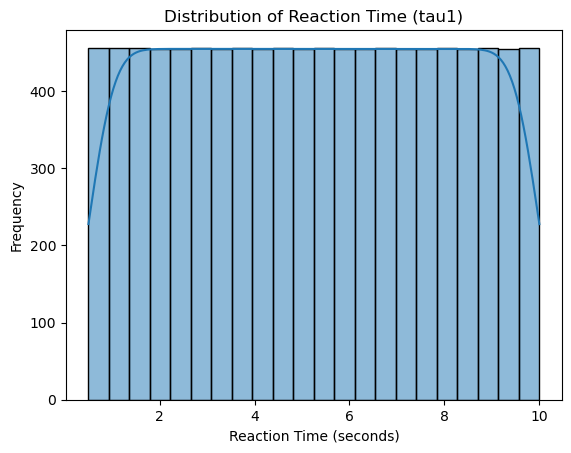

In [6]:
# 1. Distribution of Reaction Time (tau[x]) for different participants (e.g., tau1, tau2, etc.)

sns.histplot(df['tau1'],kde='True')
plt.title('Distribution of Reaction Time (tau1)')            
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Frequency')
plt.show()

### Range is B/W 0.5 - 10

C:\Users\toshiba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


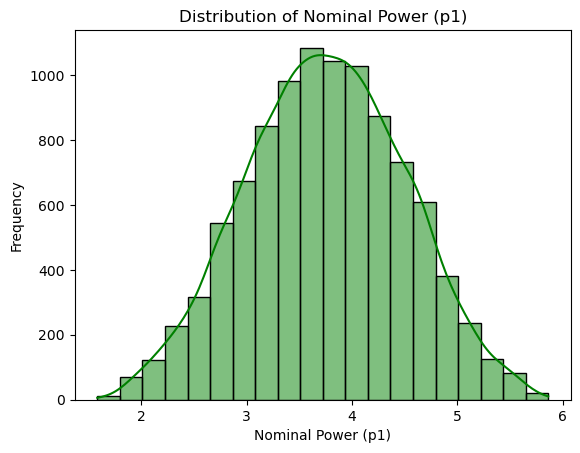

In [17]:
# 2. Distribution of Nominal Power Consumed/Produced (e.g., p1, p2, p3, p4)


sns.histplot(df['p1'], kde=True, color='green', bins=20)
plt.title('Distribution of Nominal Power (p1)')
plt.xlabel('Nominal Power (p1)')
plt.ylabel('Frequency')
plt.show()

C:\Users\toshiba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


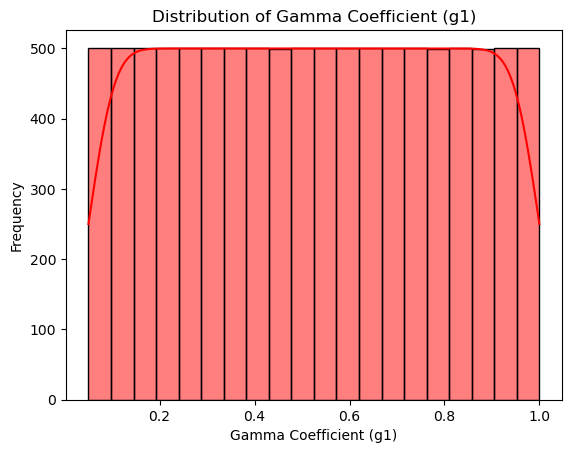

In [19]:
# 3. Distribution of Gamma Coefficient (g1)

sns.histplot(df['g1'], kde=True, color='red', bins=20)
plt.title('Distribution of Gamma Coefficient (g1)')
plt.xlabel('Gamma Coefficient (g1)')
plt.ylabel('Frequency')
plt.show()

C:\Users\toshiba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


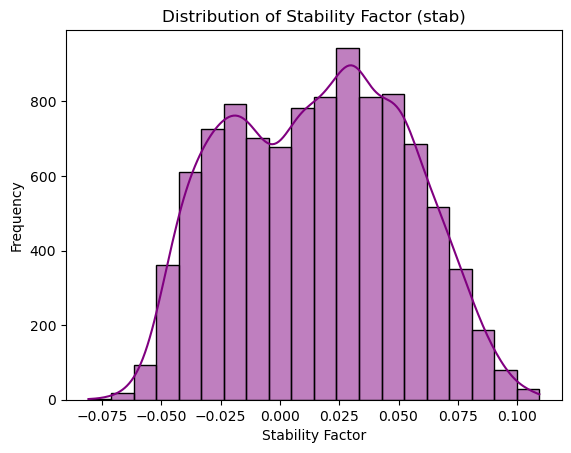

In [20]:
# 4. Distribution of Stability Factor (stab)

sns.histplot(df['stab'], kde=True, color='purple', bins=20)
plt.title('Distribution of Stability Factor (stab)')
plt.xlabel('Stability Factor')
plt.ylabel('Frequency')
plt.show()


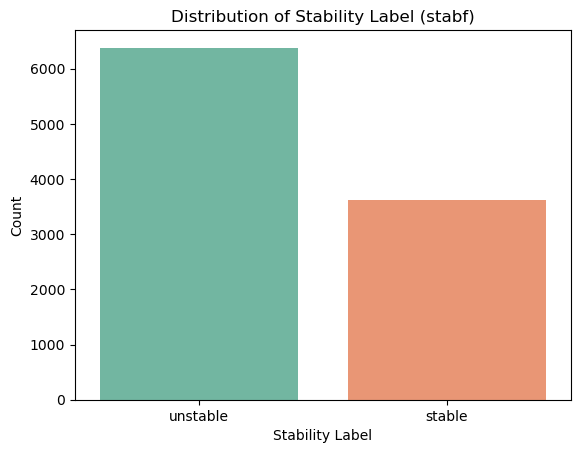

In [21]:
# 5. Distribution of Stability Label (stabf)

sns.countplot(x='stabf', data=df, palette='Set2')
plt.title('Distribution of Stability Label (stabf)')
plt.xlabel('Stability Label')
plt.ylabel('Count')
plt.show()

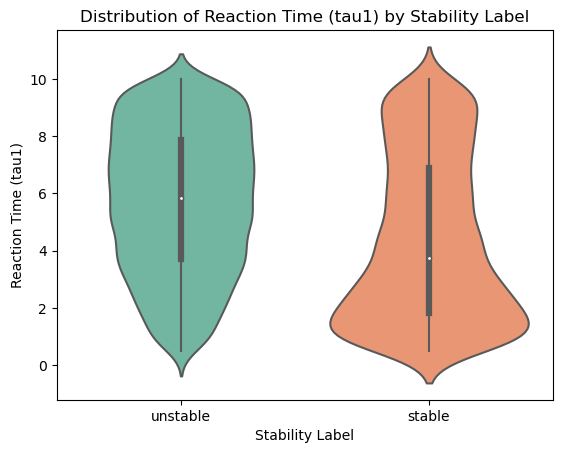

In [11]:
# 6. Violin plot to see reaction time distribution by stability label

sns.violinplot(x='stabf', y='tau1', data=df, palette='Set2')
plt.title('Distribution of Reaction Time (tau1) by Stability Label')
plt.xlabel('Stability Label')
plt.ylabel('Reaction Time (tau1)')
plt.show()

# finding outliers

In [13]:
numeric_df = df.select_dtypes(include='number')

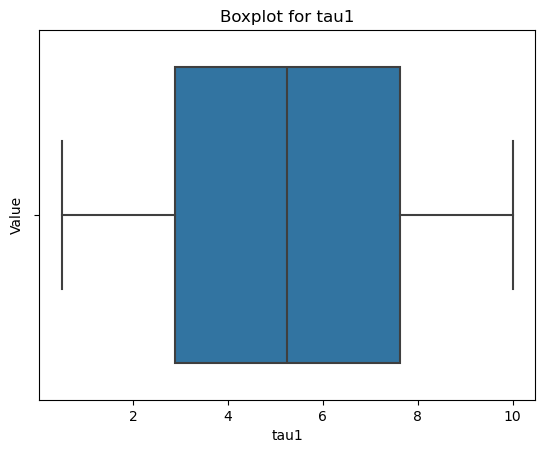

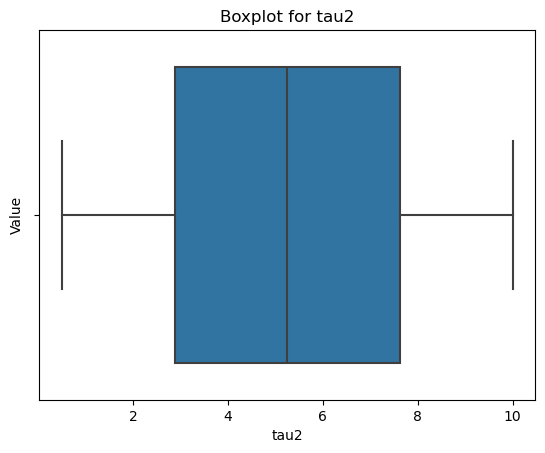

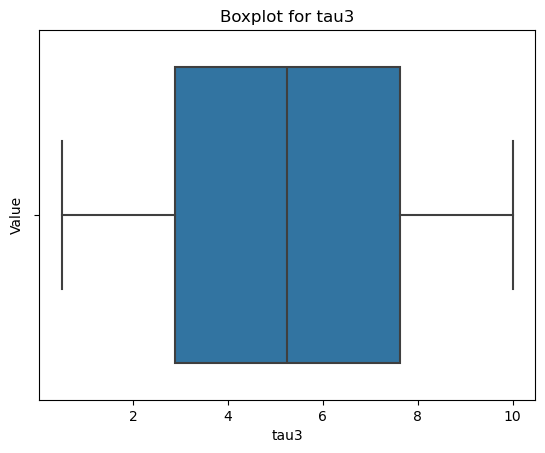

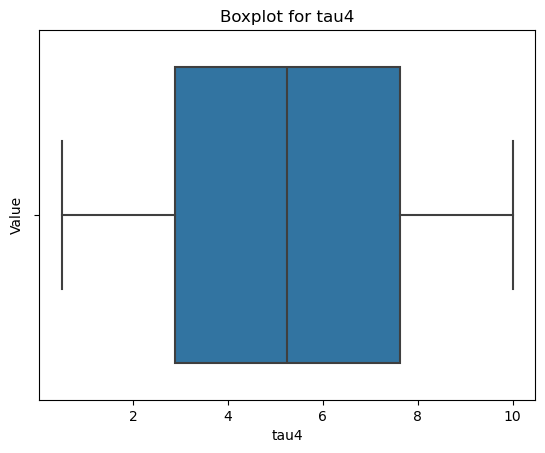

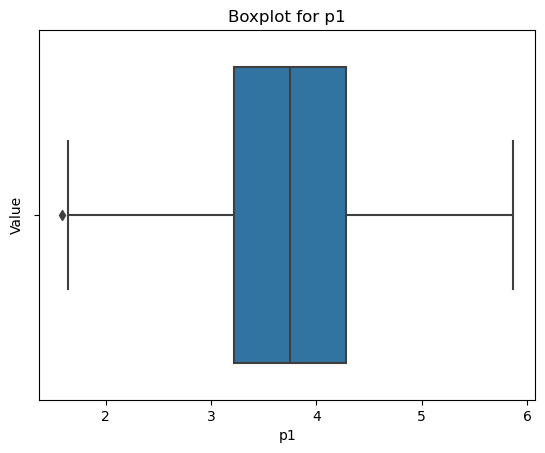

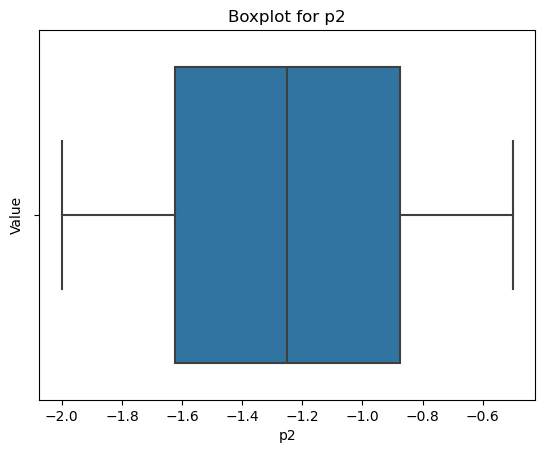

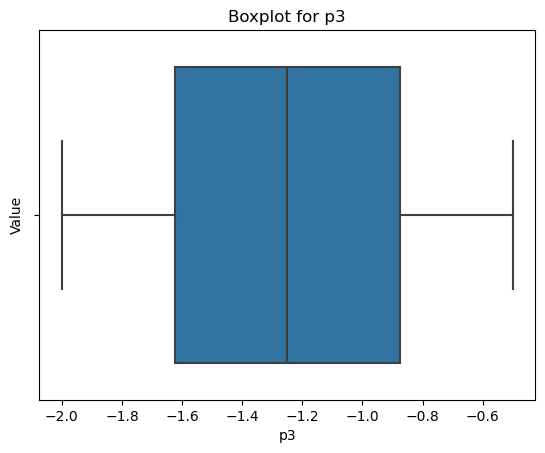

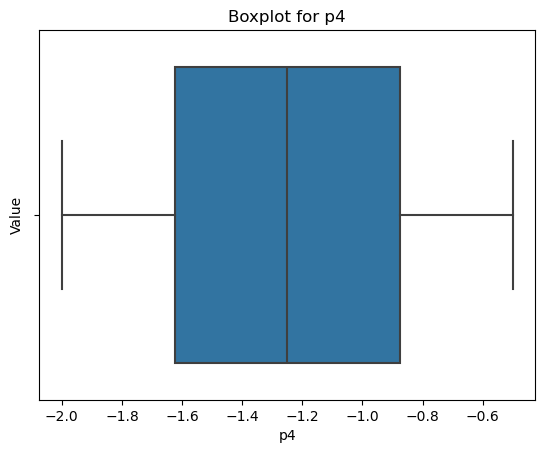

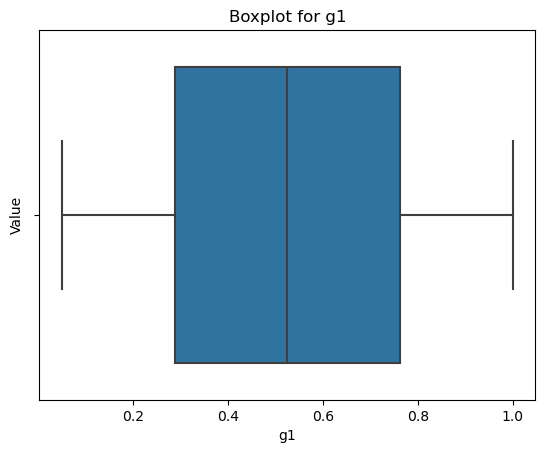

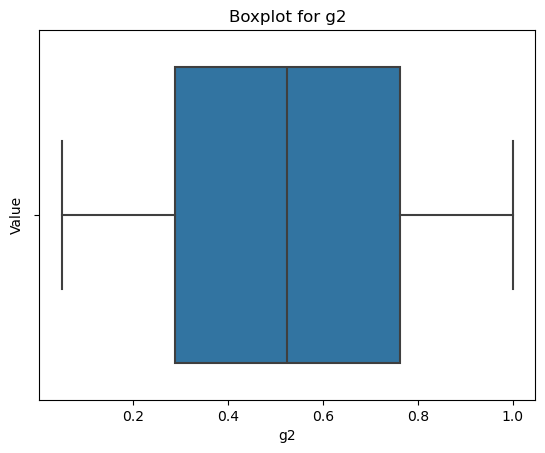

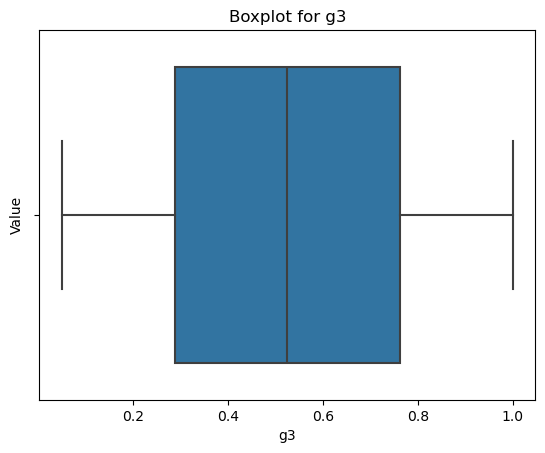

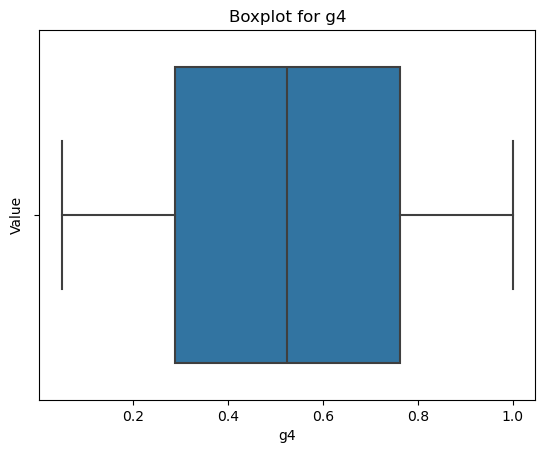

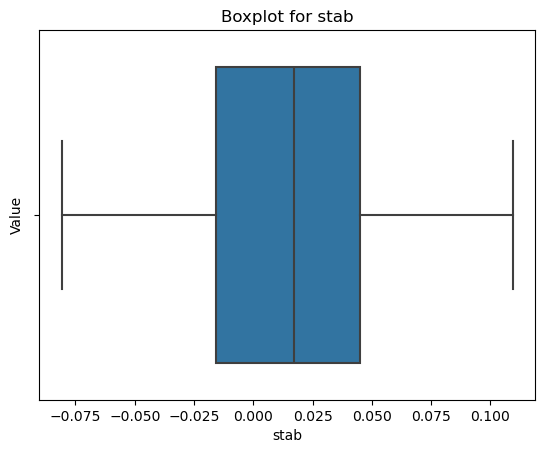

In [15]:
# Create boxplots for each feature separately

for feature in numeric_df.columns:
    sns.boxplot(x=numeric_df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.show()

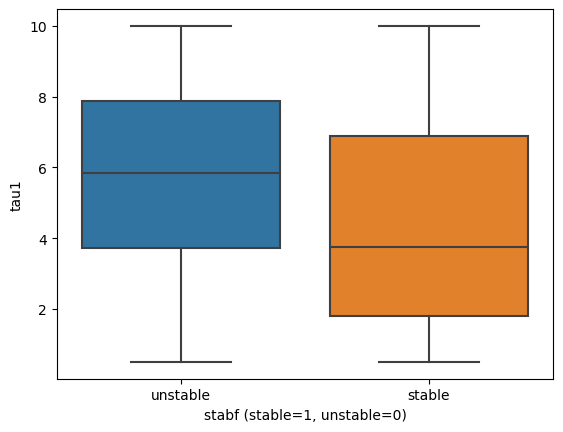

In [20]:
sns.boxplot(x='stabf' , y= 'tau1' , data=df)
plt.xlabel('stabf (stable=1, unstable=0)')
plt.ylabel('tau1')
plt.show()

### Using IQR method for outlier detection

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate IQR (Interquartile Range) for each feature

IQR = Q3 - Q1

print(Q1,Q3,IQR)

tau1    2.874892
tau2    2.875140
tau3    2.875522
tau4    2.874950
p1      3.218300
p2     -1.624901
p3     -1.625025
p4     -1.624960
g1      0.287521
g2      0.287552
g3      0.287514
g4      0.287494
stab   -0.015557
Name: 0.25, dtype: float64 tau1    7.624690
tau2    7.624893
tau3    7.624948
tau4    7.624838
p1      4.282420
p2     -0.874977
p3     -0.875043
p4     -0.875065
g1      0.762435
g2      0.762490
g3      0.762440
g4      0.762433
stab    0.044878
Name: 0.75, dtype: float64 tau1    4.749798
tau2    4.749753
tau3    4.749427
tau4    4.749888
p1      1.064120
p2      0.749924
p3      0.749982
p4      0.749895
g1      0.474913
g2      0.474939
g3      0.474927
g4      0.474939
stab    0.060435
dtype: float64


In [24]:
# Identify outliers for all features (values outside the lower and upper bounds)

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Find rows with outliers in any feature

outliers_df = numeric_df[outliers.any(axis=1)]

print(outliers_df)

          tau1      tau2     tau3      tau4       p1        p2        p3  \
6273  6.698111  7.861157  9.33348  2.433936  1.58259 -0.503865 -0.571522   

            p4        g1        g2        g3        g4      stab  
6273 -0.507202  0.641753  0.868178  0.494277  0.410666  0.056923  


In [25]:
outliers

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
# outliers removal of all n umeric features

numeric_df_no_outliers = ((numeric_df >= (Q1 - 1.5 * IQR)) | (numeric_df <= (Q3 + 1.5 * IQR)))
numeric_df_no_outliers


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True


In [31]:
#trimming datas
nu_outliers =len(numeric_df)-len(numeric_df_no_outliers)
nu_outliers

0

In [32]:
len(numeric_df_no_outliers)

10000